In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

In [16]:
dataall = pd.read_csv('../data/churn.csv')

In [17]:
dataall.shape

(50000, 12)

In [14]:
data_test = pd.read_csv('../data/churn_test.csv')

In [15]:
data_test.shape

(10000, 12)

In [12]:
data.shape

(40000, 12)

In [2]:
data = pd.read_csv('../data/churn_train.csv')

In [3]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.9400,5.0000,5.0000,1.0000,Astapor,2014-05-03,Android,2014-01-12,0.0000,0,False,100.0000
1,8.0600,5.0000,5.0000,1.0000,Astapor,2014-01-26,Android,2014-01-25,0.0000,2,True,0.0000
2,21.5000,4.0000,nan,1.0000,Winterfell,2014-05-21,iPhone,2014-01-02,0.0000,1,True,100.0000
3,9.4600,5.0000,nan,2.7500,Winterfell,2014-01-10,Android,2014-01-09,100.0000,1,False,100.0000
4,13.7700,5.0000,nan,1.0000,Winterfell,2014-05-13,iPhone,2014-01-31,0.0000,0,False,100.0000


In [6]:
# setup dir
import sys, os
sys.path.insert(0, os.path.abspath('/Users/pault/Desktop/github/galvanize_course/useful/'))

In [8]:
# import useful stuff
import models_class as md #prediction, get_coeffs, get_stats, plot_resid, qqplot
#from models_class import prediction, get_coeffs, get_stats, plot_resid, qqplot
from pd_eda_class import data_cls # data class for EDA stuff
import paul_useful_funcs as funcs

In [4]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,"40,000.0000","39,838.0000","33,472.0000","40,000.0000","40,000.0000","40,000.0000","40,000.0000"
mean,5.7913,4.7774,4.6017,1.0750,8.8573,2.2807,60.8744
std,5.7081,0.4481,0.6148,0.2224,20.0140,3.8113,37.0896
min,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
25%,2.4200,4.7000,4.3000,1.0000,0.0000,0.0000,33.3000
50%,3.8800,5.0000,4.9000,1.0000,0.0000,1.0000,66.7000
75%,6.9300,5.0000,5.0000,1.0500,8.3000,3.0000,100.0000
max,160.9600,5.0000,5.0000,8.0000,100.0000,125.0000,100.0000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [9]:
dataobj = data_cls(data)

1. city: city this user signed up in phone: primary device for this user
1. signup_date: date of account registration; in the form YYYYMMDD
1. last_trip_date: the last time this user completed a trip; in the form YYYYMMDD
1. avg_dist: the average distance (in miles) per trip taken in the first 30 days after signup
1. avg_rating_by_driver: the rider’s average rating over all of their trips
1. avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
1. surge_pct: the percent of trips taken with surge multiplier > 1
1. avg_surge: The average surge multiplier over all of this user’s trips
1. trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
1. luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise
1. weekday_pct: the percent of the user’s trips occurring during a weekday

In [36]:
cols = list(dataobj.df.columns)
cols = ['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct']

In [37]:
#drop = ['city', 'phone', 'last_trip_date', 'signup_date')]
#cols = [e for e in cols if e not in ('item', 5)]

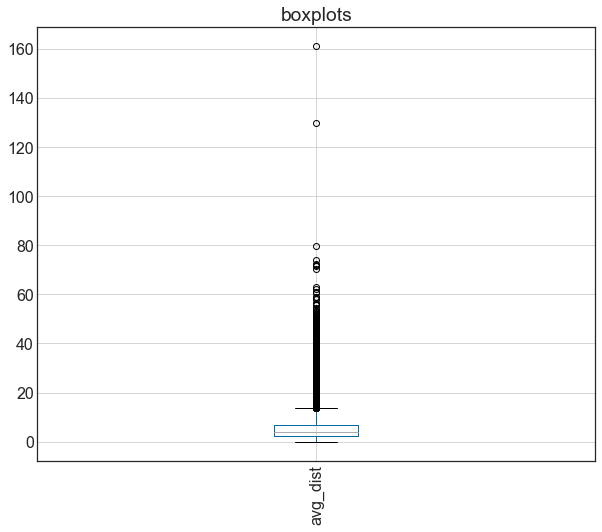

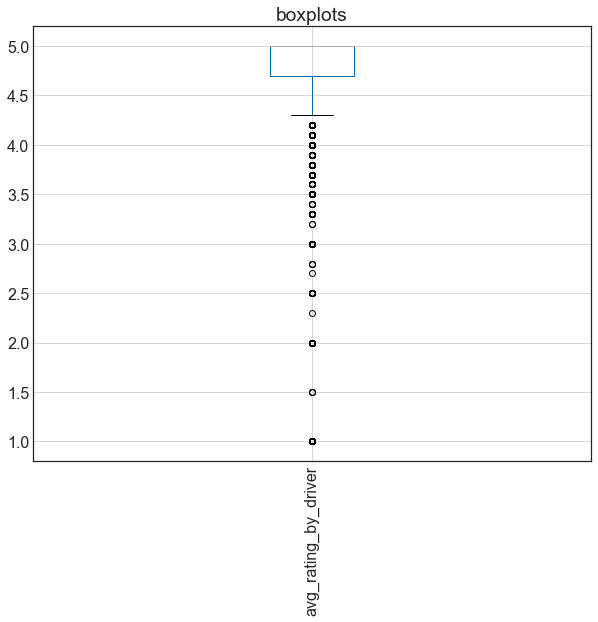

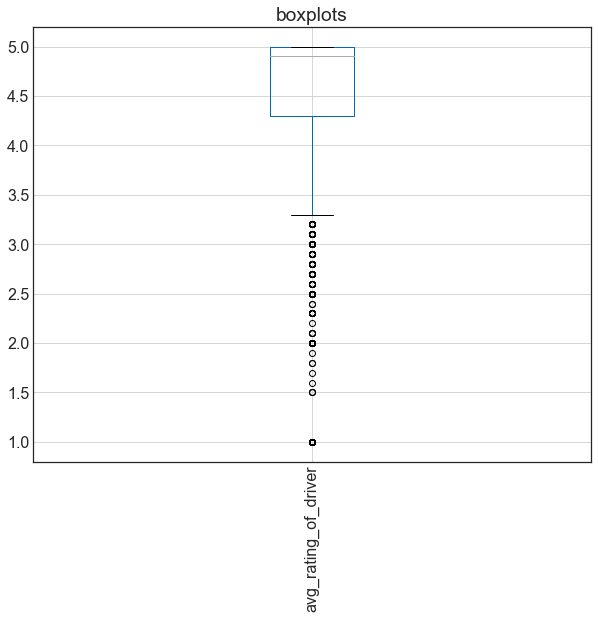

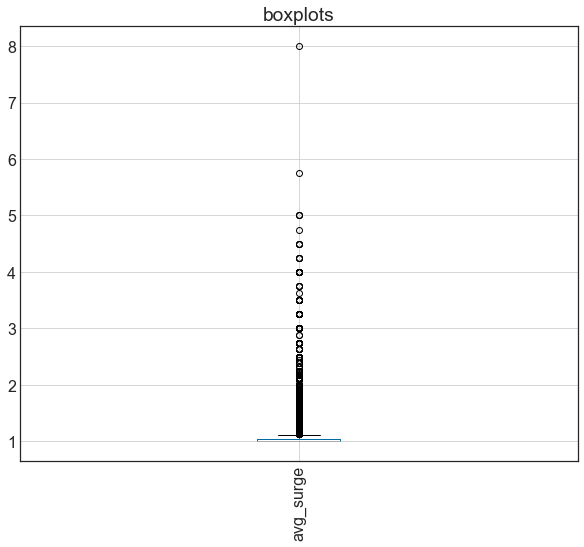

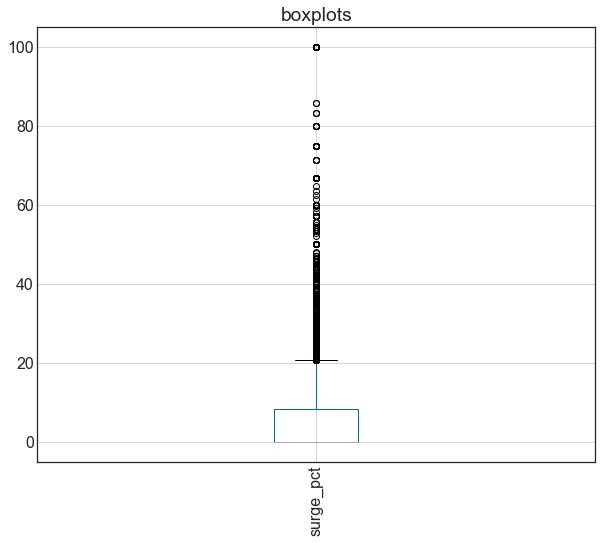

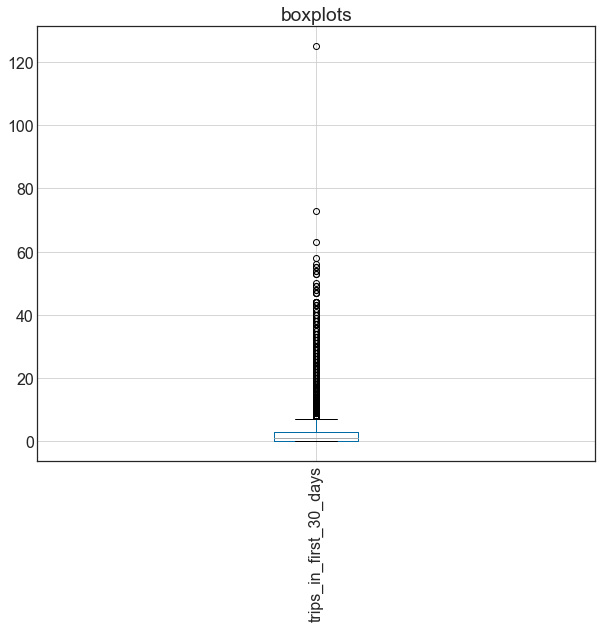

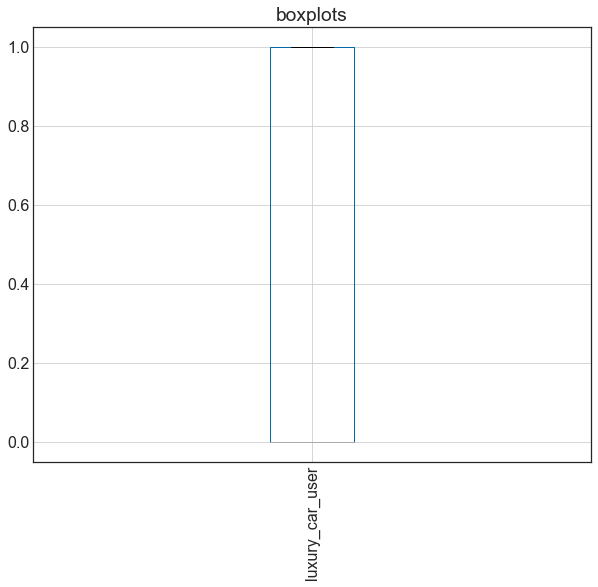

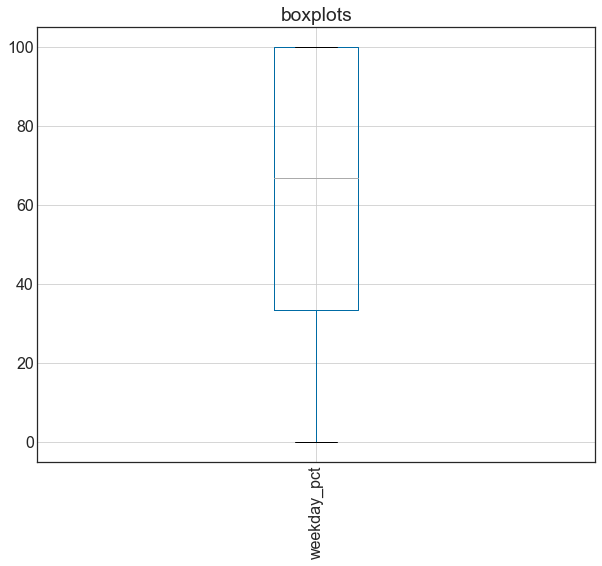

In [42]:
for i in range(len(cols)):
    dataobj.boxplot(cols[i], 'boxplots')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

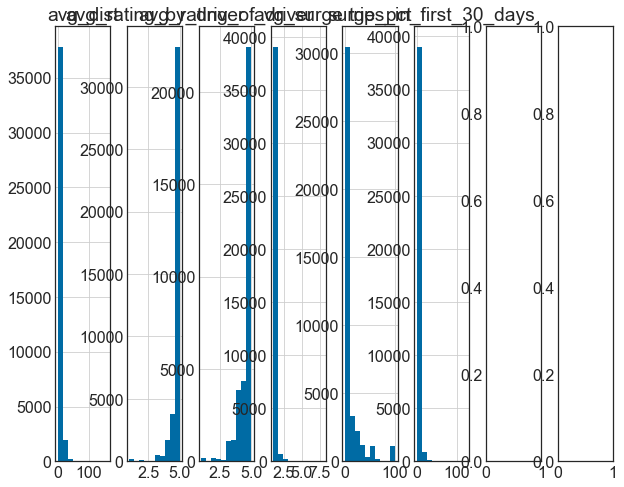

In [43]:
dataobj.histplot(cols, 'title')

In [23]:
dataobj.get_corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
avg_dist,1.00,0.13,0.05,-0.14,-0.14,-0.10,0.03,0.09
avg_rating_by_driver,0.13,1.00,0.22,-0.18,-0.17,-0.28,-0.07,0.06
avg_rating_of_driver,0.05,0.22,1.00,-0.11,-0.10,-0.17,-0.04,0.03
avg_surge,-0.14,-0.18,-0.11,1.00,0.99,0.26,-0.00,-0.16
surge_pct,-0.14,-0.17,-0.10,0.99,1.00,0.25,-0.01,-0.16
trips_in_first_30_days,-0.10,-0.28,-0.17,0.26,0.25,1.00,0.09,-0.05
luxury_car_user,0.03,-0.07,-0.04,-0.00,-0.01,0.09,1.00,0.01
weekday_pct,0.09,0.06,0.03,-0.16,-0.16,-0.05,0.01,1.00


In [44]:
# check for correlation
dataobj.df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.9400,5.0000,5.0000,1.0000,Astapor,2014-05-03,Android,2014-01-12,0.0000,0,False,100.0000
1,8.0600,5.0000,5.0000,1.0000,Astapor,2014-01-26,Android,2014-01-25,0.0000,2,True,0.0000
2,21.5000,4.0000,nan,1.0000,Winterfell,2014-05-21,iPhone,2014-01-02,0.0000,1,True,100.0000
3,9.4600,5.0000,nan,2.7500,Winterfell,2014-01-10,Android,2014-01-09,100.0000,1,False,100.0000
4,13.7700,5.0000,nan,1.0000,Winterfell,2014-05-13,iPhone,2014-01-31,0.0000,0,False,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.0600,4.8000,4.3000,1.0800,Winterfell,2014-04-02,Android,2014-01-26,9.5000,8,False,90.5000
39996,2.0500,5.0000,5.0000,1.0000,King's Landing,2014-05-09,iPhone,2014-01-08,0.0000,2,False,85.7000
39997,3.0400,5.0000,5.0000,1.0000,Winterfell,2014-06-24,Android,2014-01-04,0.0000,3,True,33.3000
39998,3.4900,4.3000,3.3000,1.5000,Astapor,2014-02-09,iPhone,2014-01-08,40.0000,5,False,60.0000


In [51]:
data.scatter('avg_rating_of_driver', )

AttributeError: 'DataFrame' object has no attribute 'scatter'